# Solar_Radiation_Prediction

<img src="pic\images.jpg" />

# Description
>**Content**
- The dataset contains such columns as: "wind direction", "wind speed", "humidity" and temperature.
- The response parameter that is to be predicted is: "Solar_radiation".
- It contains measurements for the past 4 months and you have to predict the level of solar radiation.
- Just imagine that you've got solar energy batteries and you want to know will it be reasonable to use them in future?
<br>

>**Inspiration**
- Predict the level of solar radiation.
- Here are some intersecting dependences that i have figured out:
- Humidity & Solarradiation. 2.Temeperature & Solarradiation.
- The best result of accuracy I could get using cross-validation was only 55%.
# About this file
>These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.
For each dataset, the fields are:
A row number (1-n) useful in sorting this export's results
The UNIX time_t date (seconds since Jan 1, 1970). 
Useful in sorting this export's results with other export's results
The date in yyyy-mm-dd format
The local time of day in hh:mm:ss 24-hour format
The numeric data, if any (may be an empty string)
The text data, if any (may be an empty string)

**The units of each dataset are:**

Solar radiation: watts per meter^2

Temperature: degrees Fahrenheit

Humidity: percent

Barometric pressure: Hg

Wind direction: degrees

Wind speed: miles per hour

Sunrise/sunset: Hawaii time


## Invoke the libraries that we will use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline
sb.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

## Reading CSV file

In [2]:
df=pd.read_csv('SolarPrediction.csv')

In [3]:
# display the first five rows
df.head()

UNIXTime            Date      Time  Radiation  Temperature  Pressure  \
0  1475229326  9/29/2016 0:00  23:55:26       1.21           48     30.46   
1  1475229023  9/29/2016 0:00  23:50:23       1.21           48     30.46   
2  1475228726  9/29/2016 0:00  23:45:26       1.23           48     30.46   
3  1475228421  9/29/2016 0:00  23:40:21       1.21           48     30.46   
4  1475228124  9/29/2016 0:00  23:35:24       1.17           48     30.46   

   Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0        59                  177.39   5.62     6:13:00   18:13:00  
1        58                  176.78   3.37     6:13:00   18:13:00  
2        57                  158.75   3.37     6:13:00   18:13:00  
3        60                  137.71   3.37     6:13:00   18:13:00  
4        62                  104.95   5.62     6:13:00   18:13:00

In [4]:
# display the last five rows
df.tail()

UNIXTime            Date     Time  Radiation  Temperature  Pressure  \
32681  1480587604  12/1/2016 0:00  0:20:04       1.22           44     30.43   
32682  1480587301  12/1/2016 0:00  0:15:01       1.17           44     30.42   
32683  1480587001  12/1/2016 0:00  0:10:01       1.20           44     30.42   
32684  1480586702  12/1/2016 0:00  0:05:02       1.23           44     30.42   
32685  1480586402  12/1/2016 0:00  0:00:02       1.20           44     30.43   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
32681       102                  145.42   6.75     6:41:00   17:42:00  
32682       102                  117.78   6.75     6:41:00   17:42:00  
32683       102                  145.19   9.00     6:41:00   17:42:00  
32684       101                  164.19   7.87     6:41:00   17:42:00  
32685       101                   83.59   3.37     6:41:00   17:42:00

## Assessing and Building Intuition

In [5]:
# get the shape of the data
print(f'Number of rows is: {df.shape[0]}')
print(f'Number of columns is: {df.shape[1]}')

Number of rows is: 32686
Number of columns is: 11


In [6]:
# this displays the type of the data
df.dtypes

UNIXTime                    int64
Date                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

> **We want to drop the `UNIXTime` because i don't need this column.
Then, we want to convert `Date`, `Time`, `TimeSunRise`, and `TimeSunSet` columns to data time so we can dealing with them.**

In [7]:
# getting some information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Date                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


>* Oure data have total 11 columns and total 32686 entries from 0 to 32685.
* Also, we have 4 columns are float64, 3 columns int64, and 4columns object
* As we can see, dtypes: float64(4), int64(3), object(4)
* memory usage: 2.7+ MB

In [8]:
# the number of unique values of each column.
df.nunique()

UNIXTime                  32686
Date                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

In [9]:
#check if there are null values 
df.isnull().sum()

UNIXTime                  0
Date                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [10]:
# ckeck if there are duplicate values 
df.duplicated().sum()

0

In [11]:
#return usuful descriptive statistics for each column  
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%                147.700000      5.620000  
75%                179.310000      7.870000  
max                359.950000     40.500000

## Getting value counts for each column

In [12]:
df.Radiation.value_counts()

1.22       2264
1.23       2110
1.21       2010
1.24       1725
1.20       1558
           ... 
601.96        1
658.63        1
108.51        1
1040.07       1
322.68        1
Name: Radiation, Length: 14434, dtype: int64

In [13]:
df.Temperature.value_counts()

45    2951
48    2610
47    2488
46    2135
50    2097
49    2038
51    1916
52    1557
53    1339
54    1272
44    1237
57    1071
55    1061
58    1021
56     988
59     921
60     790
62     679
63     678
61     659
43     615
64     528
42     422
41     395
65     257
40     230
66     146
38     107
39     100
67      96
37      93
68      51
36      38
69      36
70      36
71      17
35      10
34       1
Name: Temperature, dtype: int64

In [14]:
df.Pressure.value_counts()

30.44    3297
30.43    3170
30.45    3068
30.42    2867
30.46    2706
30.41    2340
30.47    2272
30.40    2025
30.48    1619
30.39    1486
30.49    1081
30.38     929
30.50     641
30.37     638
30.36     503
30.34     460
30.31     329
30.32     323
30.35     319
30.33     298
30.29     284
30.51     281
30.28     261
30.30     259
30.52     195
30.26     185
30.25     174
30.27     121
30.24     113
30.54      84
30.23      74
30.53      60
30.21      53
30.22      47
30.20      41
30.55      33
30.56      33
30.19      17
Name: Pressure, dtype: int64

In [15]:
df.Humidity.value_counts()

102    2107
101    2003
93     1796
100    1507
99     1220
       ... 
13       43
14       42
12       14
11        4
8         1
Name: Humidity, Length: 94, dtype: int64

In [16]:
df['WindDirection(Degrees)'].value_counts()

0.11      94
359.93    65
359.92    47
0.10      39
0.12      36
          ..
56.55      1
78.38      1
119.10     1
97.33      1
7.25       1
Name: WindDirection(Degrees), Length: 17951, dtype: int64

In [17]:
df.Speed.value_counts()

5.62     4609
4.50     4503
6.75     4326
3.37     3874
7.87     3550
2.25     2777
9.00     2504
10.12    1720
1.12     1373
11.25    1084
12.37     691
0.00      492
13.50     453
14.62     251
15.75     150
16.87      88
18.00      57
19.12      35
20.25      25
24.75      17
23.62      16
21.37      11
29.25       9
31.50       9
27.00       9
25.87       9
22.50       8
28.12       7
32.62       7
30.37       6
33.75       4
34.87       3
36.00       3
37.12       2
38.25       2
39.37       1
40.50       1
Name: Speed, dtype: int64

## Cleaning the data

> **Firstly, i am going to drop `UNIXTime` and `Time` column.**

In [18]:
df.drop(['UNIXTime','Time'],axis=1, inplace=True)

> **Secondly, i will convert `Date`, `Time`, `TimeSunRise`, and `TimeSunSet` columns to data time.**

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M' )
df.head()

Date  Radiation  Temperature  Pressure  Humidity  \
0 2016-09-29       1.21           48     30.46        59   
1 2016-09-29       1.21           48     30.46        58   
2 2016-09-29       1.23           48     30.46        57   
3 2016-09-29       1.21           48     30.46        60   
4 2016-09-29       1.17           48     30.46        62   

   WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0                  177.39   5.62     6:13:00   18:13:00  
1                  176.78   3.37     6:13:00   18:13:00  
2                  158.75   3.37     6:13:00   18:13:00  
3                  137.71   3.37     6:13:00   18:13:00  
4                  104.95   5.62     6:13:00   18:13:00

In [20]:
time_cols=['TimeSunRise','TimeSunSet']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")
df.head()

Date  Radiation  Temperature  Pressure  Humidity  \
0 2016-09-29       1.21           48     30.46        59   
1 2016-09-29       1.21           48     30.46        58   
2 2016-09-29       1.23           48     30.46        57   
3 2016-09-29       1.21           48     30.46        60   
4 2016-09-29       1.17           48     30.46        62   

   WindDirection(Degrees)  Speed         TimeSunRise          TimeSunSet  
0                  177.39   5.62 2020-10-13 06:13:00 2020-10-13 18:13:00  
1                  176.78   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00  
2                  158.75   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00  
3                  137.71   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00  
4                  104.95   5.62 2020-10-13 06:13:00 2020-10-13 18:13:00

>**Here, I will extract some dates from main columns.**

In [21]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Week'] = df['Date'].dt.week
df['Day'] = df['Date'].dt.day
df['Week_Day'] = df['Date'].dt.weekday

#Weekday is a day of the week except those which form the weekend;
#that is: Monday, Tuesday, Wednesday, Thursday or Friday, but not Saturday or Sunday.

df['Day_Name'] = df['Date'].dt.day_name()

df['Hour_TimeSunRise'] = df['TimeSunRise'].dt.hour
df['Minute_TimeSunRise'] = df['TimeSunRise'].dt.minute

df['Hour_TimeSunSet'] = df['TimeSunSet'].dt.hour
df['Minute_TimeSunSet'] = df['TimeSunSet'].dt.minute

df.head()

Date  Radiation  Temperature  Pressure  Humidity  \
0 2016-09-29       1.21           48     30.46        59   
1 2016-09-29       1.21           48     30.46        58   
2 2016-09-29       1.23           48     30.46        57   
3 2016-09-29       1.21           48     30.46        60   
4 2016-09-29       1.17           48     30.46        62   

   WindDirection(Degrees)  Speed         TimeSunRise          TimeSunSet  \
0                  177.39   5.62 2020-10-13 06:13:00 2020-10-13 18:13:00   
1                  176.78   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00   
2                  158.75   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00   
3                  137.71   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00   
4                  104.95   5.62 2020-10-13 06:13:00 2020-10-13 18:13:00   

   Year  Month Month_Name  Week  Day  Week_Day  Day_Name  Hour_TimeSunRise  \
0  2016      9  September    39   29         3  Thursday                 6   
1  2016      9  September    39   29         3  Thursday                 6   
2  2016      9  September    39   29         3  Thursday                 6   
3  2016      9  September    39   29         3  Thursday                 6   
4  2016      9  September    39   29         3  Thursday                 6   

   Minute_TimeSunRise  Hour_TimeSunSet  Minute_TimeSunSet  
0                  13               18                 13  
1                  13               18                 13  
2                  13               18                 13  
3                  13               18                 13  
4                  13               18                 13

>**Also, we can extract the Winter, Summer, and Autumn. As we will do now.**

In [22]:
# make Season column that has season based on the month 
 
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)
df.head()

Date  Radiation  Temperature  Pressure  Humidity  \
0 2016-09-29       1.21           48     30.46        59   
1 2016-09-29       1.21           48     30.46        58   
2 2016-09-29       1.23           48     30.46        57   
3 2016-09-29       1.21           48     30.46        60   
4 2016-09-29       1.17           48     30.46        62   

   WindDirection(Degrees)  Speed         TimeSunRise          TimeSunSet  \
0                  177.39   5.62 2020-10-13 06:13:00 2020-10-13 18:13:00   
1                  176.78   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00   
2                  158.75   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00   
3                  137.71   3.37 2020-10-13 06:13:00 2020-10-13 18:13:00   
4                  104.95   5.62 2020-10-13 06:13:00 2020-10-13 18:13:00   

   Year  ...  Month_Name Week  Day  Week_Day  Day_Name Hour_TimeSunRise  \
0  2016  ...   September   39   29         3  Thursday                6   
1  2016  ...   September   39   29         3  Thursday                6   
2  2016  ...   September   39   29         3  Thursday                6   
3  2016  ...   September   39   29         3  Thursday                6   
4  2016  ...   September   39   29         3  Thursday                6   

   Minute_TimeSunRise  Hour_TimeSunSet  Minute_TimeSunSet  Season  
0                  13               18                 13  Autumn  
1                  13               18                 13  Autumn  
2                  13               18                 13  Autumn  
3                  13               18                 13  Autumn  
4                  13               18                 13  Autumn  

[5 rows x 21 columns]

>**Then, i will drop old columns from the data.**

In [23]:
df.drop(['Date','TimeSunRise','TimeSunSet'], axis=1, inplace=True)

In [24]:
# display the data again
df.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Year  Month Month_Name  Week  Day  Week_Day  Day_Name  Hour_TimeSunRise  \
0  2016      9  September    39   29         3  Thursday                 6   
1  2016      9  September    39   29         3  Thursday                 6   
2  2016      9  September    39   29         3  Thursday                 6   
3  2016      9  September    39   29         3  Thursday                 6   
4  2016      9  September    39   29         3  Thursday                 6   

   Minute_TimeSunRise  Hour_TimeSunSet  Minute_TimeSunSet  Season  
0                  13               18                 13  Autumn  
1                  13               18                 13  Autumn  
2                  13               18                 13  Autumn  
3                  13               18                 13  Autumn  
4                  13               18                 13  Autumn

In [25]:
#save the data in a new file 
df.to_csv('New_Solar_Radiation_Prediction.csv', index=False)

<img src="pic\energy_balance.jpg" />


In [26]:
#reading CSV file 
sr=pd.read_csv('New_Solar_Radiation_Prediction.csv')
sr.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Year  Month Month_Name  Week  Day  Week_Day  Day_Name  Hour_TimeSunRise  \
0  2016      9  September    39   29         3  Thursday                 6   
1  2016      9  September    39   29         3  Thursday                 6   
2  2016      9  September    39   29         3  Thursday                 6   
3  2016      9  September    39   29         3  Thursday                 6   
4  2016      9  September    39   29         3  Thursday                 6   

   Minute_TimeSunRise  Hour_TimeSunSet  Minute_TimeSunSet  Season  
0                  13               18                 13  Autumn  
1                  13               18                 13  Autumn  
2                  13               18                 13  Autumn  
3                  13               18                 13  Autumn  
4                  13               18                 13  Autumn

## Visualizing the data

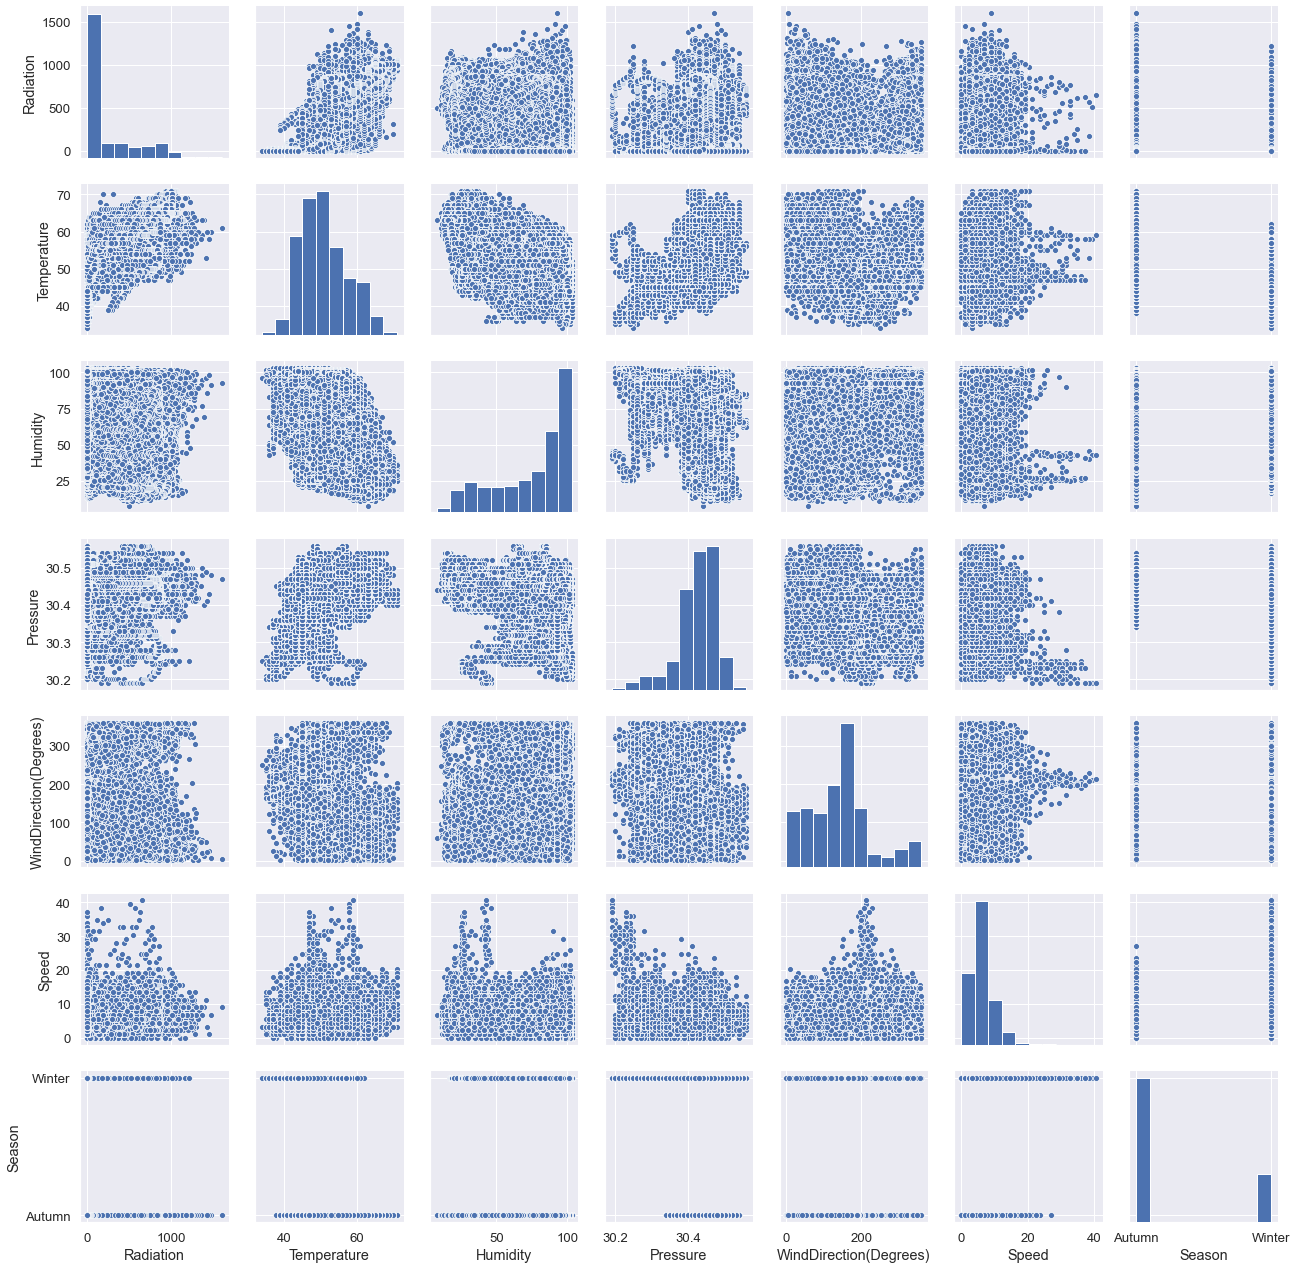

In [27]:
sb.pairplot(sr, vars=['Radiation', 'Temperature', 'Humidity', 'Pressure', 'WindDirection(Degrees)','Speed','Season'])

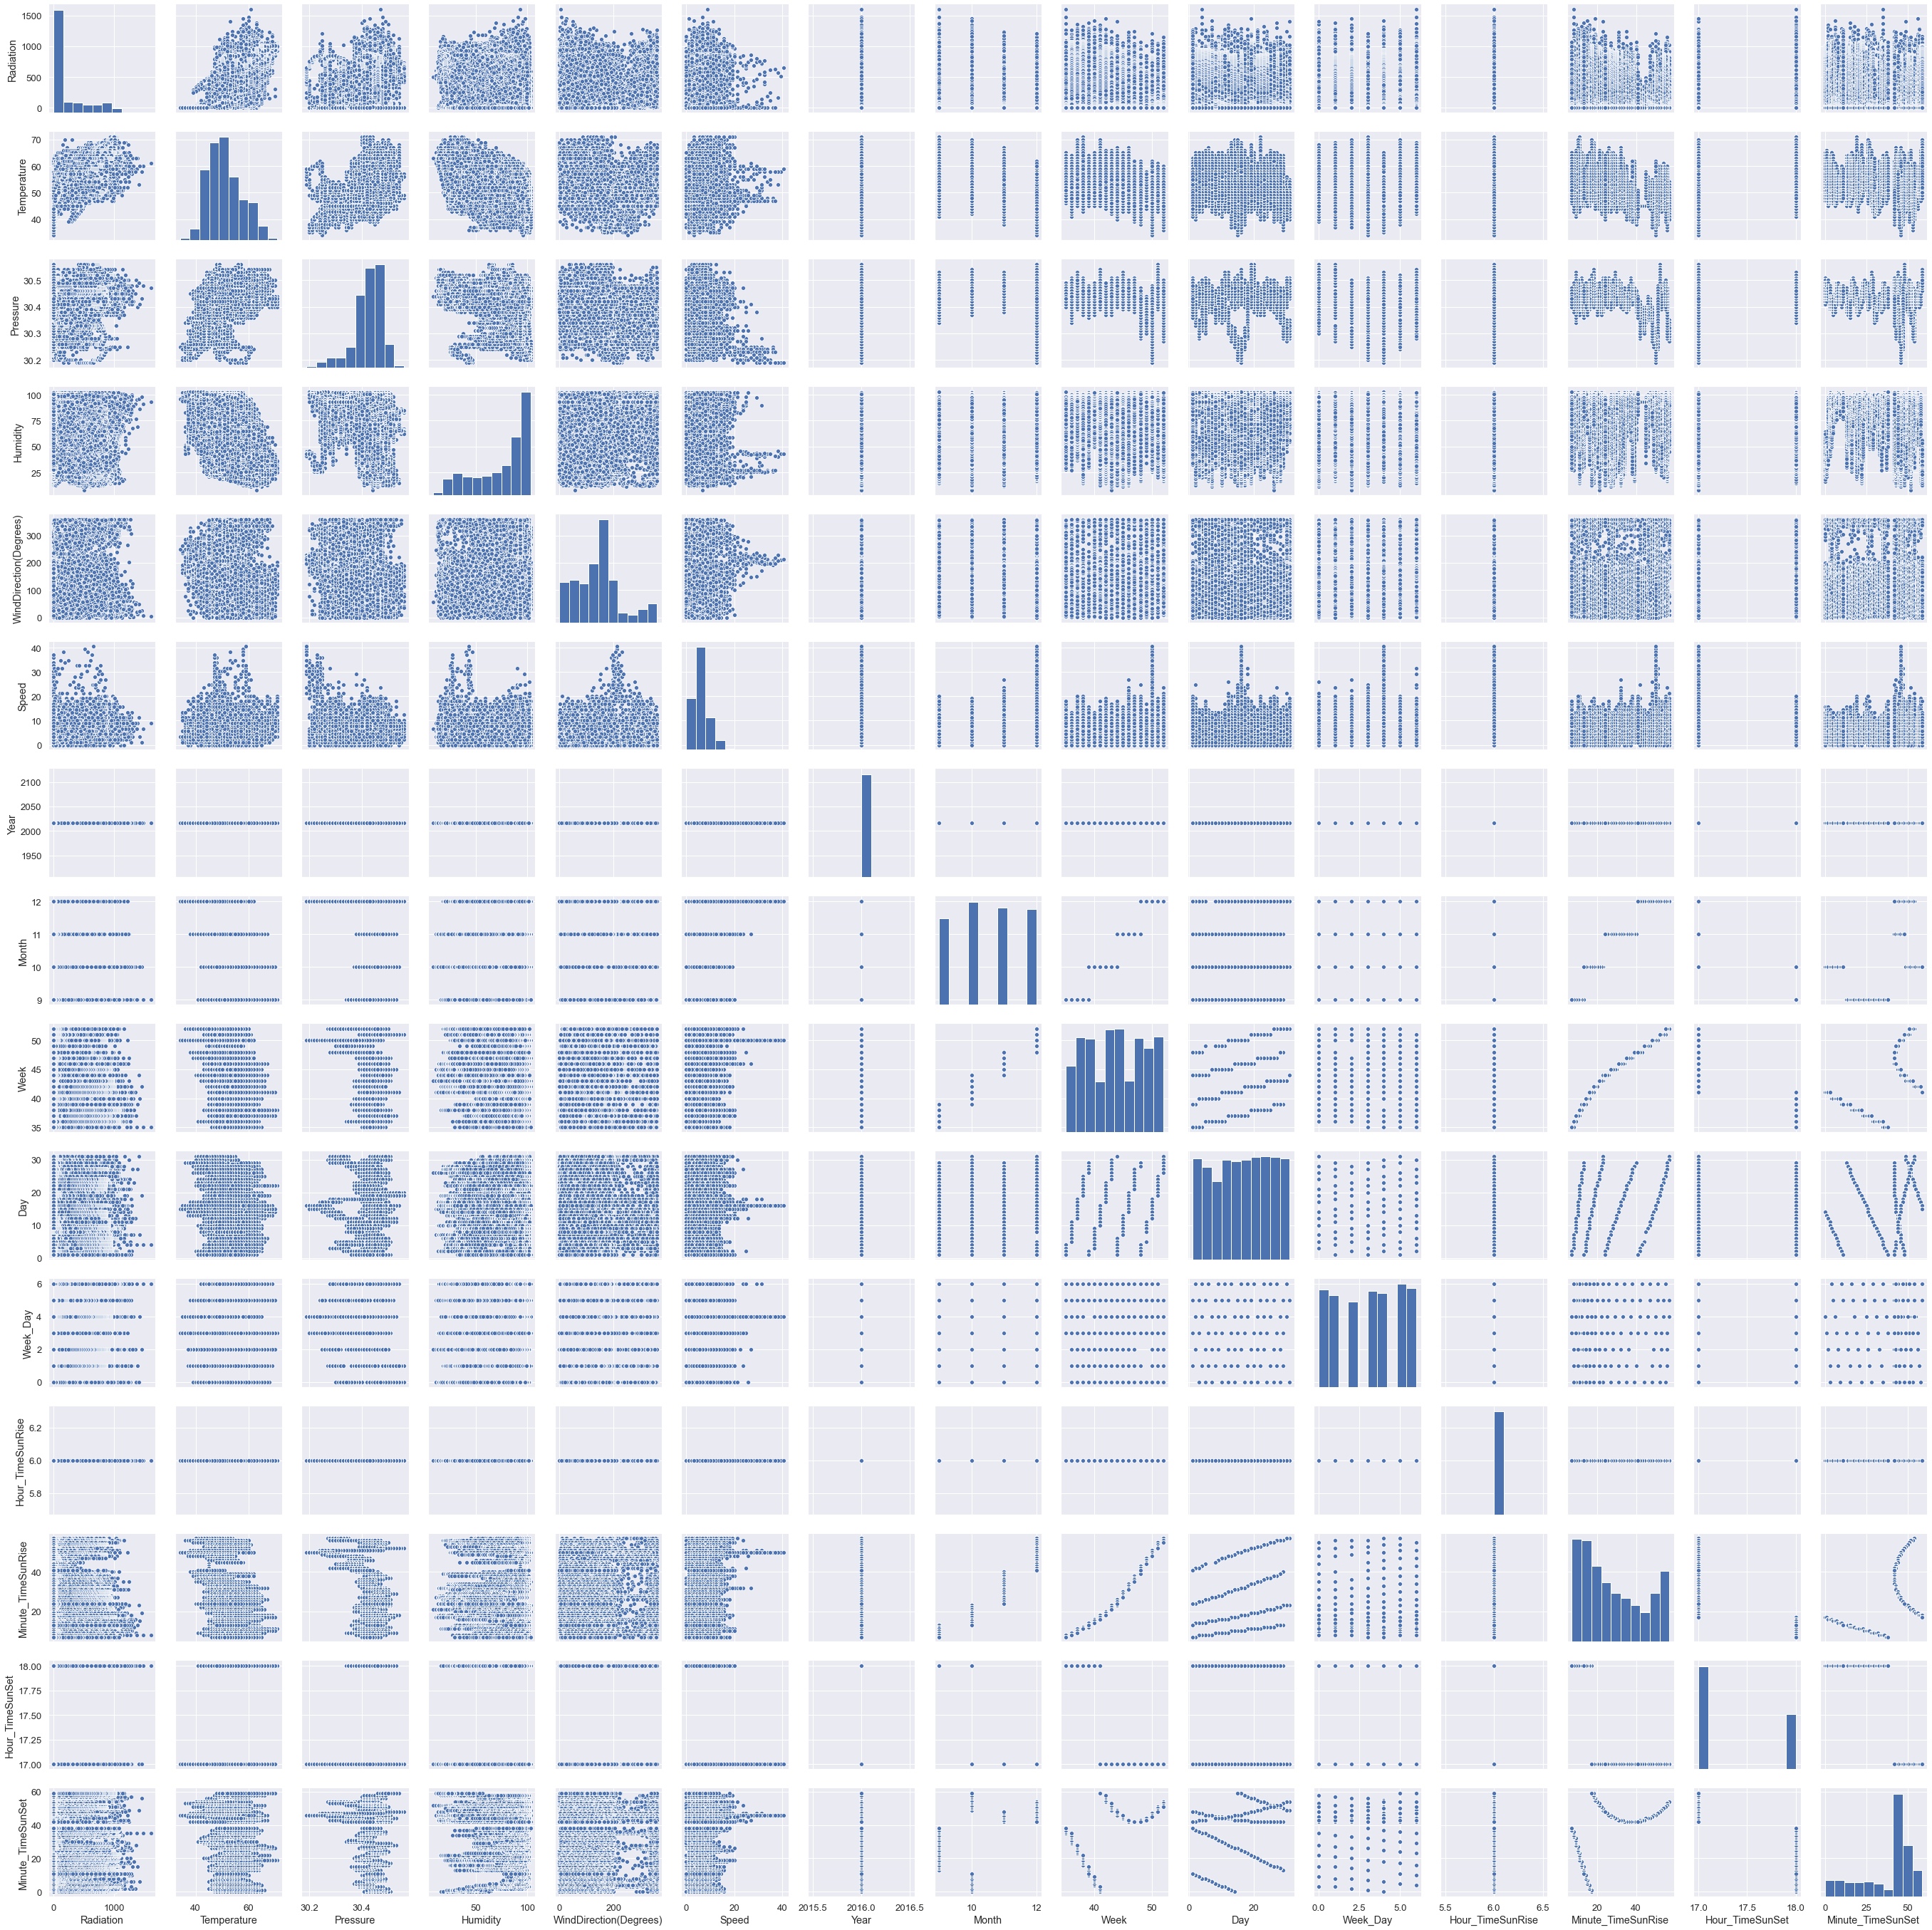

In [28]:
sb.pairplot(sr)

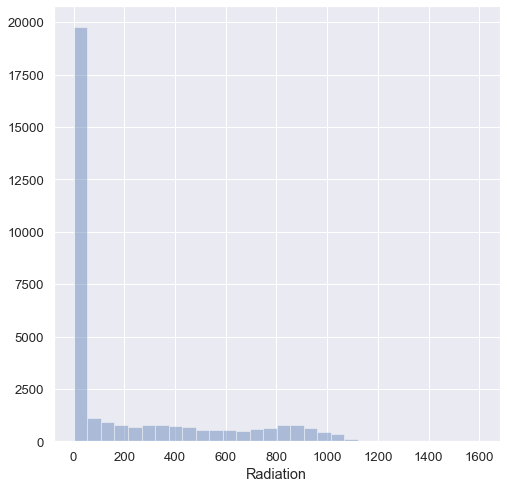

In [29]:
sb.distplot(sr['Radiation'], kde=False, bins=30, color='b')

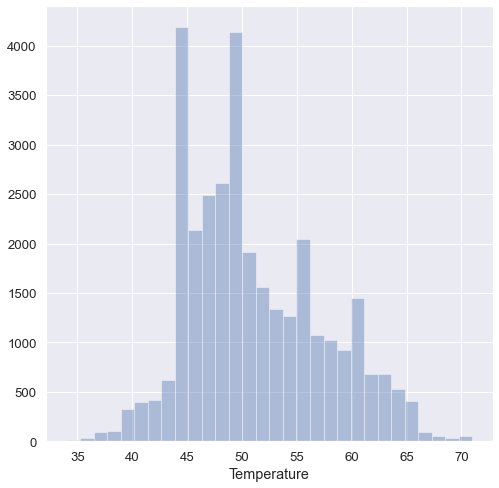

In [30]:
sb.distplot(sr['Temperature'], kde=False, bins=30, color='b')

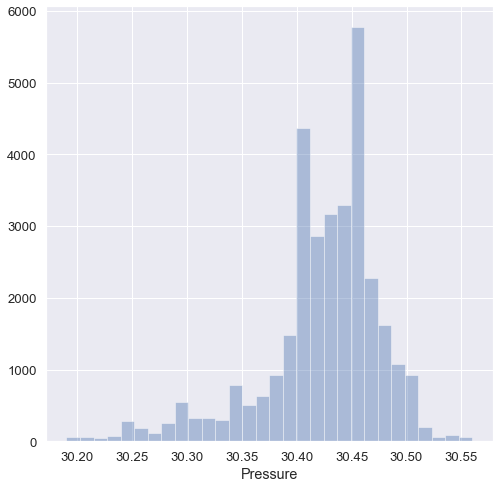

In [31]:
sb.distplot(sr['Pressure'], kde=False, bins=30, color='b')

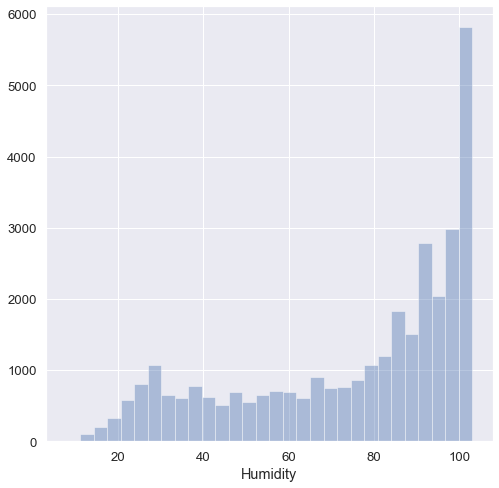

In [32]:
sb.distplot(sr['Humidity'], kde=False, bins=30, color='b')

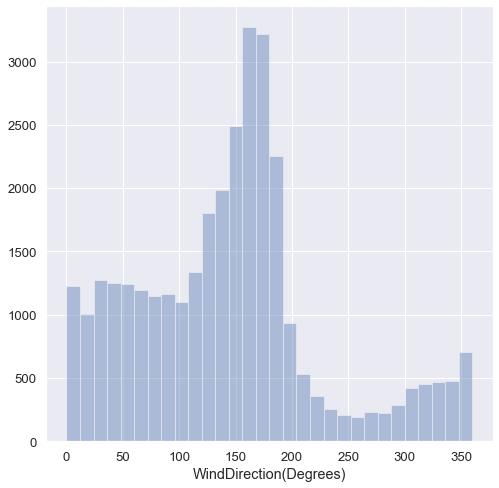

In [33]:
sb.distplot(sr['WindDirection(Degrees)'], kde=False, bins=30, color='b')

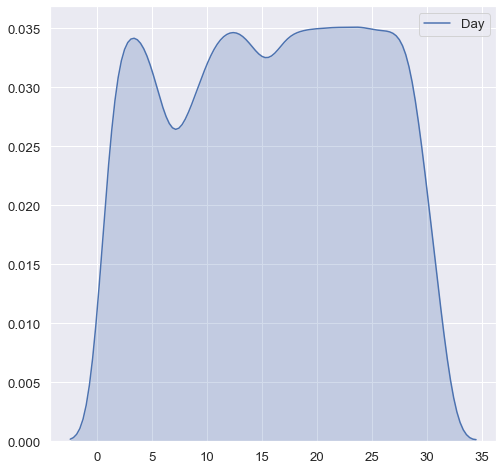

In [34]:
sb.kdeplot(sr['Day'], shade=True, color='b');

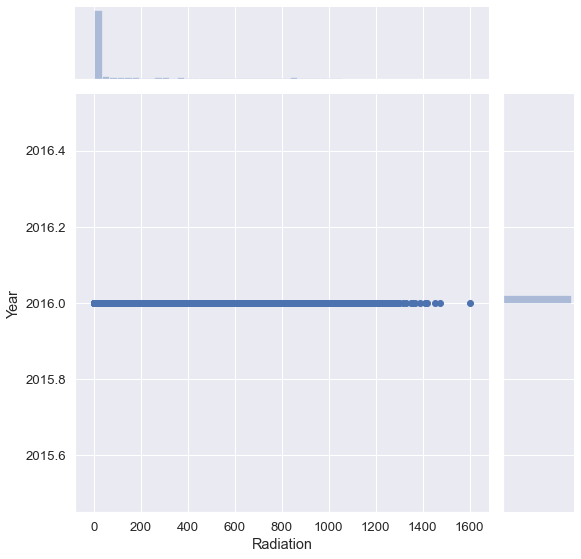

In [35]:
sb.jointplot(y='Year', x='Radiation', data=sr, height=8, color='b')

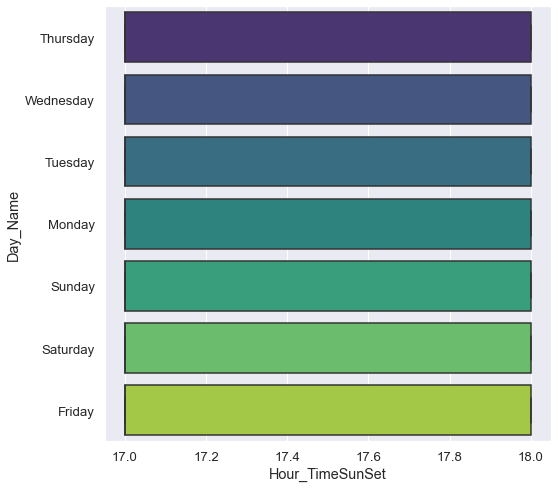

In [36]:
sb.boxplot(y="Day_Name", x="Hour_TimeSunSet", data=sr, palette='viridis')

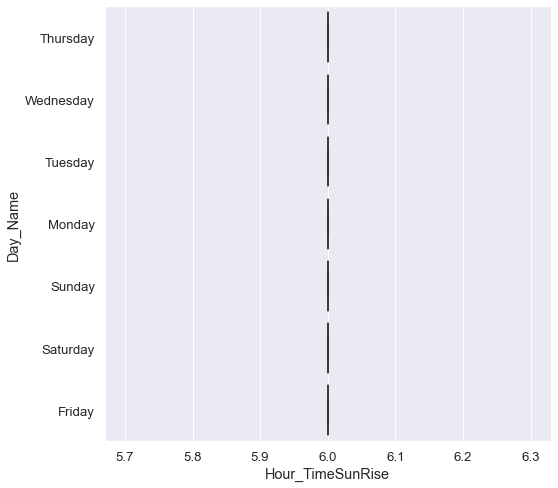

In [37]:
sb.boxplot(y="Day_Name", x="Hour_TimeSunRise", data=sr, palette='viridis')

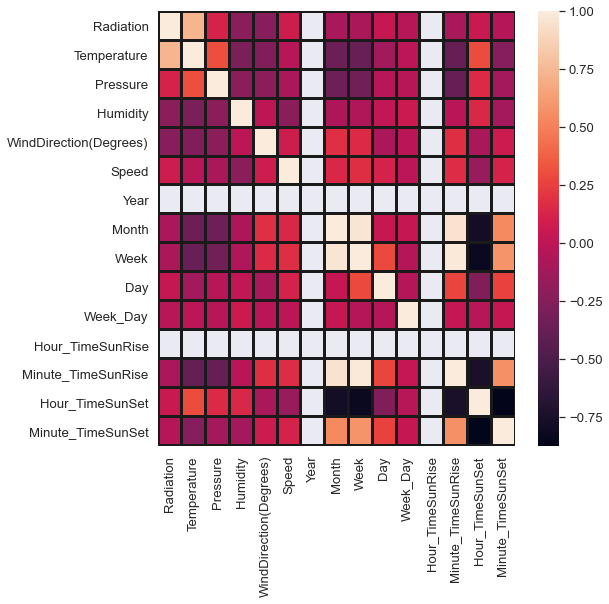

In [38]:
sb.heatmap(sr.corr(),linecolor='k', linewidths=2 )

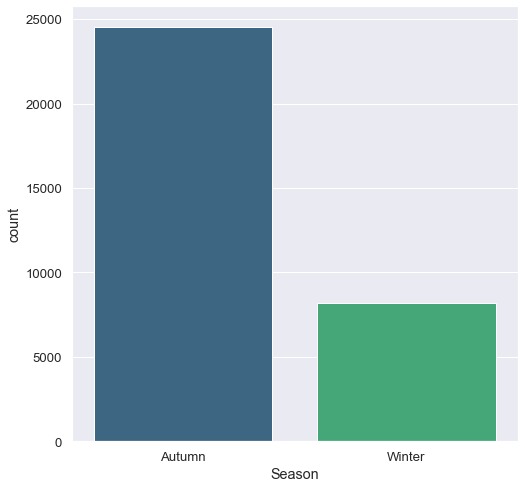

In [39]:
sb.countplot(x='Season', data=sr, palette='viridis')

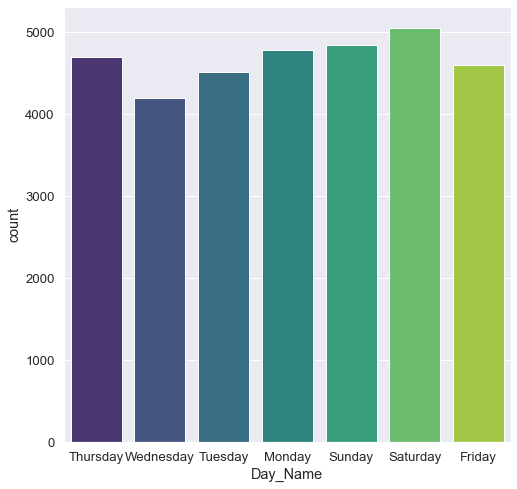

In [40]:
sb.countplot(x='Day_Name', data=sr, palette='viridis')

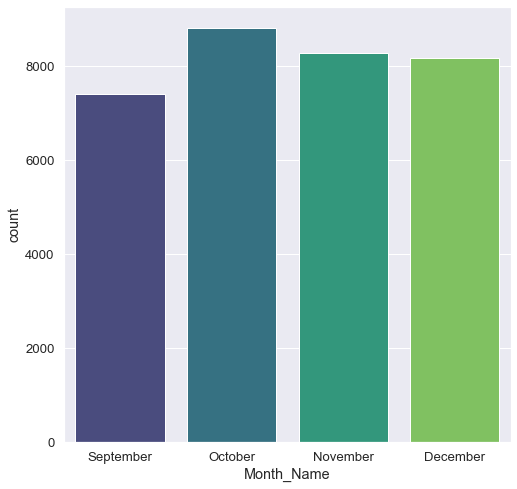

In [41]:
sb.countplot(x='Month_Name', data=sr, palette='viridis')

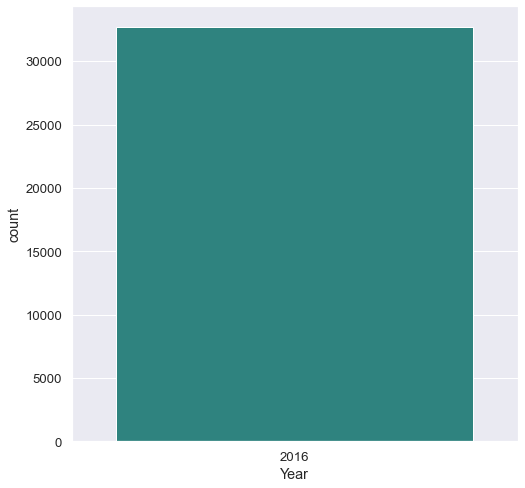

In [42]:
sb.countplot(x='Year', data=sr, palette='viridis')

# Detect Outliers

In [43]:
from datasist.structdata import detect_outliers

In [44]:
sr.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Year', 'Month', 'Month_Name',
       'Week', 'Day', 'Week_Day', 'Day_Name', 'Hour_TimeSunRise',
       'Minute_TimeSunRise', 'Hour_TimeSunSet', 'Minute_TimeSunSet', 'Season'],
      dtype='object')

In [45]:
outliers_indices = detect_outliers(df, 0, ['Radiation', 'Temperature', 'Pressure', 'Humidity','WindDirection(Degrees)', 
                                           'Speed', ])
len(outliers_indices)

5109

In [46]:
outliers_indices

[117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 674,
 675,
 684,
 708,
 709,
 712,
 714,
 715,
 716,
 718,
 719,
 720,
 721,
 722,
 724,
 725,
 726,
 727,
 728,
 729,
 958,
 959,
 962,
 963,
 964,
 965,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 1216,
 1220,
 1222,
 1223,
 1224,
 1225,
 1226,
 1227,
 1228,
 1230,
 1232,
 1233,
 1234,
 1235,
 1236,
 1237,
 1238,
 1239,
 1240,
 1241,
 1

In [47]:
sr.drop(outliers_indices, inplace=True)
sr.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Year  Month Month_Name  Week  Day  Week_Day  Day_Name  Hour_TimeSunRise  \
0  2016      9  September    39   29         3  Thursday                 6   
1  2016      9  September    39   29         3  Thursday                 6   
2  2016      9  September    39   29         3  Thursday                 6   
3  2016      9  September    39   29         3  Thursday                 6   
4  2016      9  September    39   29         3  Thursday                 6   

   Minute_TimeSunRise  Hour_TimeSunSet  Minute_TimeSunSet  Season  
0                  13               18                 13  Autumn  
1                  13               18                 13  Autumn  
2                  13               18                 13  Autumn  
3                  13               18                 13  Autumn  
4                  13               18                 13  Autumn

>**Convert the `Season` column from category to numeric.**

In [48]:
sr = pd.get_dummies(sr, columns=['Season'], drop_first=True)
sr.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Year  Month Month_Name  Week  Day  Week_Day  Day_Name  Hour_TimeSunRise  \
0  2016      9  September    39   29         3  Thursday                 6   
1  2016      9  September    39   29         3  Thursday                 6   
2  2016      9  September    39   29         3  Thursday                 6   
3  2016      9  September    39   29         3  Thursday                 6   
4  2016      9  September    39   29         3  Thursday                 6   

   Minute_TimeSunRise  Hour_TimeSunSet  Minute_TimeSunSet  Season_Winter  
0                  13               18                 13              0  
1                  13               18                 13              0  
2                  13               18                 13              0  
3                  13               18                 13              0  
4                  13               18                 13              0

In [49]:
sr.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Year', 'Month', 'Month_Name',
       'Week', 'Day', 'Week_Day', 'Day_Name', 'Hour_TimeSunRise',
       'Minute_TimeSunRise', 'Hour_TimeSunSet', 'Minute_TimeSunSet',
       'Season_Winter'],
      dtype='object')

# Modelling

### Split the data

In [50]:
x=sr.drop(['Radiation','Month_Name','Week','Week_Day','Day_Name','Season_Winter'], axis=1)
y = sr['Radiation']

In [51]:
# the features
x

Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  Year  \
0               48     30.46        59                  177.39   5.62  2016   
1               48     30.46        58                  176.78   3.37  2016   
2               48     30.46        57                  158.75   3.37  2016   
3               48     30.46        60                  137.71   3.37  2016   
4               48     30.46        62                  104.95   5.62  2016   
...            ...       ...       ...                     ...    ...   ...   
32681           44     30.43       102                  145.42   6.75  2016   
32682           44     30.42       102                  117.78   6.75  2016   
32683           44     30.42       102                  145.19   9.00  2016   
32684           44     30.42       101                  164.19   7.87  2016   
32685           44     30.43       101                   83.59   3.37  2016   

       Month  Day  Hour_TimeSunRise  Minute_TimeSunRise  Hour_TimeSunSet  \
0          9   29                 6                  13               18   
1          9   29                 6                  13               18   
2          9   29                 6                  13               18   
3          9   29                 6                  13               18   
4          9   29                 6                  13               18   
...      ...  ...               ...                 ...              ...   
32681     12    1                 6                  41               17   
32682     12    1                 6                  41               17   
32683     12    1                 6                  41               17   
32684     12    1                 6                  41               17   
32685     12    1                 6                  41               17   

       Minute_TimeSunSet  
0                     13  
1                     13  
2                     13  
3                     13  
4                     13  
...                  ...  
32681                 42  
32682                 42  
32683                 42  
32684                 42  
32685                 42  

[27577 rows x 12 columns]

In [52]:
#the values of each features
y

0        1.21
1        1.21
2        1.23
3        1.21
4        1.17
         ... 
32681    1.22
32682    1.17
32683    1.20
32684    1.23
32685    1.20
Name: Radiation, Length: 27577, dtype: float64

In [53]:
# break the data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

>**Now, we will try to predict by using `Linear Regression()`, `DecisionTreeRegressor()`, `RandomForestRegressor()` to know what is the more accuracy.**

In [54]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    model.fit(x_train, y_train)
    print(model.score(x_test, y_test))

0.5687142256268187
0.7412215415509815
0.8778001931752808


# 1)- LinearRegression Model

## Train the model

In [55]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Test the model 

In [56]:
y_pred = model.predict(x_test)
y_pred

array([ 132.63565645,   57.4657598 ,  506.930753  , ..., -152.89654872,
         -6.81117352,  101.90912681])

In [57]:
y_test

13183      1.24
16222      1.28
24125    649.75
25506    472.19
30778      1.27
          ...  
8754     458.81
20231      1.20
6000       2.55
10614      1.21
11642     19.89
Name: Radiation, Length: 5516, dtype: float64

## Calculate R2 Score

In [58]:
model.score(x_train, y_train)

0.5668131084117551

In [59]:
model.score(x_test, y_test)

0.5687142256268187

## Model Parameters

In [60]:
model.coef_

array([ 3.41396298e+01, -4.07970116e+02,  1.31180851e-01, -4.31628192e-01,
        6.83914873e+00, -3.52073926e-12, -1.11853306e+02, -1.07743996e+00,
       -1.13686838e-13,  8.87241786e+00, -1.86976323e+02, -2.57514897e+00])

In [61]:
model.intercept_

15137.931999933508

> **The accuracy in LinearRegression is not good we will try with RandomForestRegressor Model.**

# 2)- RandomForestRegressor Model

In [62]:
model= RandomForestRegressor(n_jobs=-1, random_state=42)

# give the model the x_train and y_train to fitting on them
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [63]:
# predict with new Y beasd on x_train
y_pred = model.predict(x_test)
y_pred

array([105.5367,  19.4412, 641.6908, ...,   3.4905,   5.5879,  10.1887])

In [64]:
y_test

13183      1.24
16222      1.28
24125    649.75
25506    472.19
30778      1.27
          ...  
8754     458.81
20231      1.20
6000       2.55
10614      1.21
11642     19.89
Name: Radiation, Length: 5516, dtype: float64

## we can calculate the R2 score by using this formula
<img src="pic\fLrDw.png" />

In [65]:
# calculate the accuracy between y_test and y_pred
r2 = r2_score(y_test, y_pred)
r2

0.8770727932579236

In [66]:
# the accuracy between x_train and y_train
model.score(x_train, y_train)

0.9826760273394677

In [67]:
# the accuracy tbetween x_test and y_test
model.score(x_test, y_test)

0.8770727932579236

# Test the Model
> **Now, I'll see the ratio between the predicted and actual data.**

In [68]:
# predicted point
model.predict(x_test)[50]

637.8285999999996

In [69]:
# Actual point
y_test.iloc[50]

672.82

>**As we can see, It seems the good ratio.**

>**In Season 0 ----> Autumn, 1 -----> Winter.**

In [70]:
# the features that i will give to Model to predict by Radiation
x.columns

Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'Year', 'Month', 'Day', 'Hour_TimeSunRise',
       'Minute_TimeSunRise', 'Hour_TimeSunSet', 'Minute_TimeSunSet'],
      dtype='object')

In [71]:
#we will give the Model new features the model never see before
model.predict([[30, 40, 39.12, 125, 13, 2020, 10, 12, 6, 22, 19, 11]])

array([43.7881])

In [72]:
round(model.predict([[30, 40, 39.12, 125, 13, 2020, 10, 12, 6, 22, 19, 11]])[0],5)

43.7881

>**45.68260000000001 is the value of radiation when the above features take the values we give.**

## Calculate `mean_absolute_error` and `mean_squared_error`

In [73]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

44.39945050044448

In [74]:
MSE = mean_squared_error(y_test, y_pred)
MSE

7687.408737320703

## The form of the model

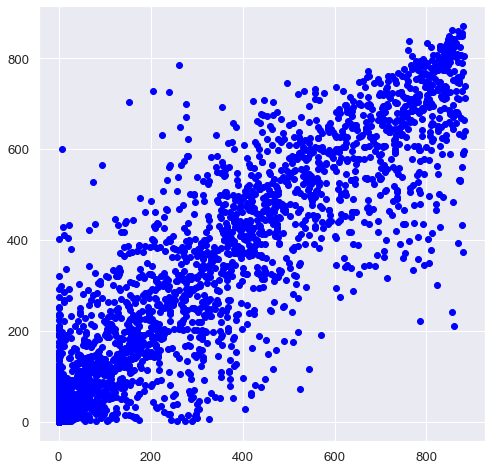

In [75]:
plt.scatter(y_test, y_pred, c="blue")

# Save the Model

In [76]:
import joblib

In [77]:
# save the experiences that Model trained on 
joblib.dump(model, 'model.pkl')

['model.pkl']

>**Now, the Model saved into `model.pkl` file.**

# Great work !